In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [130]:
Match_data=pd.read_csv(r'C:\Study Material\CSV Files For Practice\DATA\2023 Worldcup\match_schedule_results.csv')

In [131]:
Match_data.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,October 5,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,October 6,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,October 7,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,October 7,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,October 8,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [132]:
print("Number of Rows",Match_data.shape[0])
print("Number of columns",Match_data.shape[1])

Number of Rows 48
Number of columns 7


In [133]:
Match_data.dtypes

Match_no          int64
Date             object
Venue            object
Team1            object
Team2            object
Winner           object
Scorecard URL    object
dtype: object

In [134]:
# Converting the column in Right Datatype format
Match_data['Date'] = pd.to_datetime(Match_data['Date'] + '-2023', format='%B %d-%Y')
Match_data['Venue'] = Match_data['Venue'].astype('string')
Match_data['Team1'] = Match_data['Team1'].astype('string')
Match_data['Team2'] = Match_data['Team2'].astype('string')
Match_data['Winner'] = Match_data['Winner'].astype('string')

In [135]:
# Displaying the updated DataFrame
Match_data.head()

,Match_no,Date,Venue,Team1,Team2,Winner,Scorecard URL
0,1,2023-10-05,Ahmedabad,England,New Zealand,New Zealand,https://www.cricketwa.com/scorecard/18020/engl...
1,2,2023-10-06,Hyderabad,Pakistan,Netherlands,Pakistan,https://www.cricketwa.com/scorecard/18021/paki...
2,3,2023-10-07,Dharamsala,Bangladesh,Afghanistan,Bangladesh,https://www.cricketwa.com/scorecard/23008/bang...
3,4,2023-10-07,Delhi,South Africa,Sri Lanka,South Africa,https://www.cricketwa.com/scorecard/23009/sout...
4,5,2023-10-08,Chennai,India,Australia,India,https://www.cricketwa.com/scorecard/23010/indi...


In [136]:
Match_data.isnull().sum()

Match_no         0
Date             0
Venue            0
Team1            0
Team2            0
Winner           0
Scorecard URL    0
dtype: int64

In [137]:
Match_data.drop('Scorecard URL',axis=1,inplace=True)

# Match Analysis (EDA)

## Matches Are Played In Worldcup

In [138]:
Matches=Match_data['Match_no'].nunique()
print(f"The number of matches Played in the worldcup: {Matches}")

The number of matches Played in the worldcup: 48


## Distribution Of Matches Across Different Dates

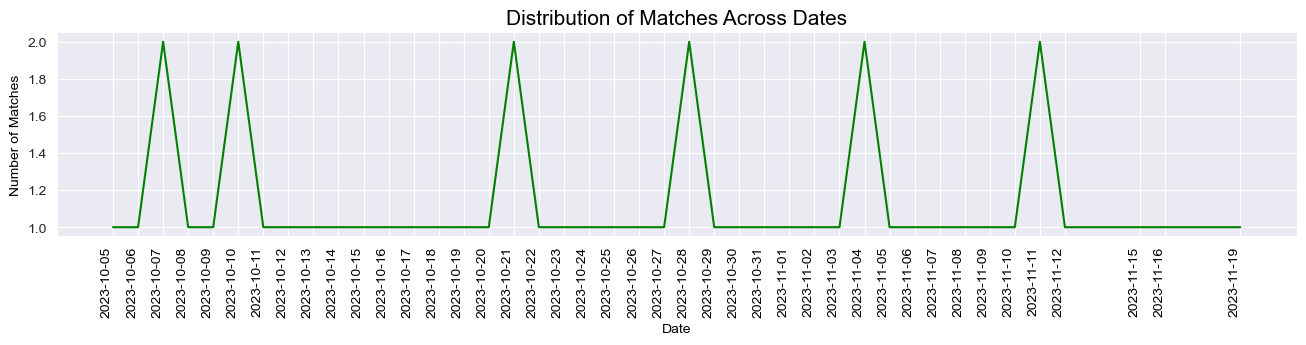

In [139]:
# Grouping matches by date and count the occurrences
matches_per_date = Match_data['Date'].value_counts().sort_index()
# Plotting the distribution of matches across dates
plt.figure(figsize=(16,3))
matches_per_date.plot(kind='line',color='green')
plt.title('Distribution of Matches Across Dates',size=15,color='black')
plt.xlabel('Date',size=10,color='black')
plt.ylabel('Number of Matches',size=10,color='black')
plt.xticks(matches_per_date.index, rotation=90,color='black')
sns.set_style(style="darkgrid")
plt.show()

## Venues Where Matches Were Held

In [140]:
venues = Match_data['Venue'].unique()
print("Different venues where matches were held:")
for venue in venues:
    print(venue)

Different venues where matches were held:
Ahmedabad
Hyderabad
Dharamsala
Delhi
Chennai
Ekana Cricket Stadium Lucknow
Pune
Bengaluru
Mumbai
Himachal Pradesh Cricket Association Stadium, Dharamsala
Kolkata


## Matches Held at Each Venue

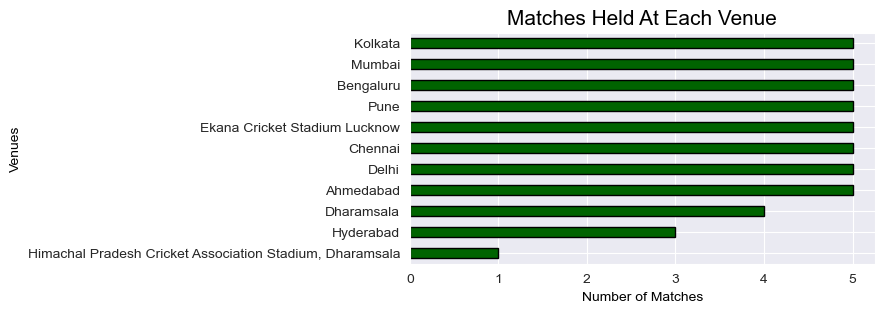

In [141]:
venue = Match_data['Venue'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(6, 3))
venue.plot(kind='barh',color='darkgreen',edgecolor='black')
plt.title('Matches Held At Each Venue',color='black',size=15)
plt.ylabel('Venues',color='black',size=10)
plt.xlabel('Number of Matches',color='black',size=10)
plt.show()

## Teams Participated In The Worldcup

In [142]:
Teams= Match_data['Winner'].unique()
print("Teams Participated in Worldcup :")
for Team in Teams:
    print(Team)

Teams Participated in Worldcup :
New Zealand
Pakistan
Bangladesh
South Africa
India
England
Afghanistan
Australia
Netherlands
Sri Lanka


## Winning Matches By Each Team 

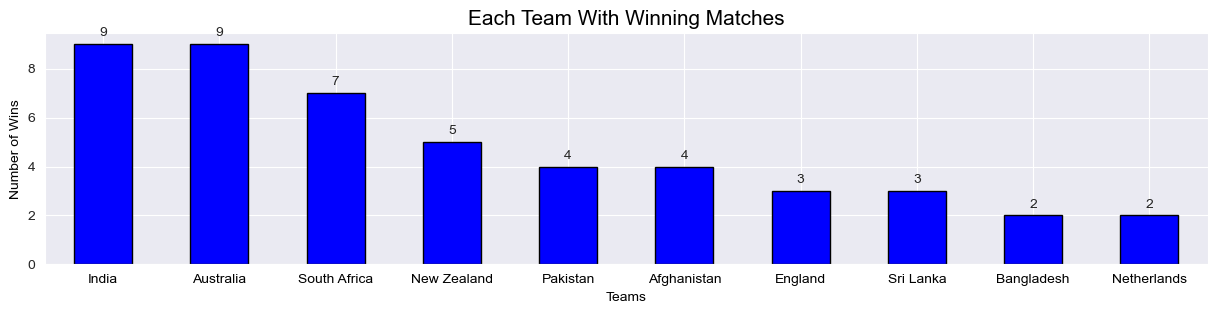

In [143]:
win_counts = Match_data[Match_data['Winner'] != 'Draw']['Winner'].value_counts()
# Plotting the frequency of each team winning matches
plt.figure(figsize=(15, 3))
win_counts.plot(kind='bar',color='blue',edgecolor='black')
plt.title('Each Team With Winning Matches',color='black',size=15)
plt.xlabel('Teams',color='black',size=10)
plt.ylabel('Number of Wins',color='black',size=10)
plt.xticks(rotation=360,color='black')
for i, v in enumerate(win_counts):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom',size=10)
plt.show()

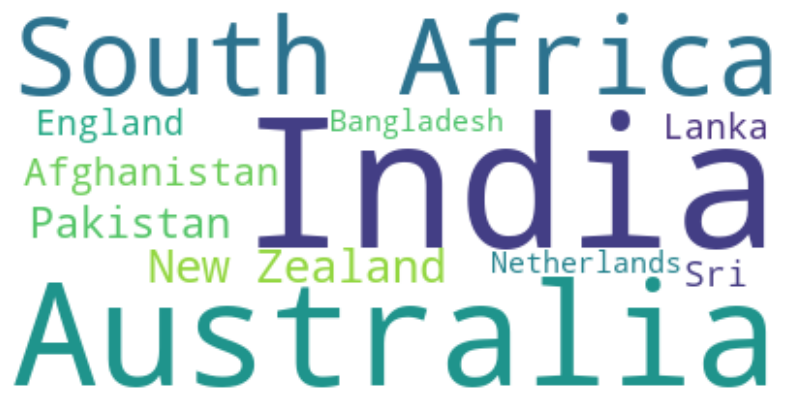

In [144]:
from wordcloud import WordCloud
text_data = ' '.join(Match_data['Winner'])
wordcloud = WordCloud(contour_color='steelblue', background_color='white').generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Batting Analysis (EDA)

In [145]:
Batting_data=pd.read_csv(r'C:\Study Material\CSV Files For Practice\DATA\2023 Worldcup\batting_summary.csv')

In [146]:
Batting_data.head()

,Match_no,Match_Between,Team_Innings,Batsman_Name,Batting_Position,Dismissal,Runs,Balls,4s,6s,Strike_Rate
0,1,England vs New Zealand,England,Jonny Bairstow,1,c Daryl Mitchell b Mitchell Santner,33,35,4,1,94.3
1,1,England vs New Zealand,England,Dawid Malan,2,c Tom Latham b Matt Henry,14,24,2,0,58.3
2,1,England vs New Zealand,England,Joe Root,3,b Glenn Phillips,77,86,4,1,89.5
3,1,England vs New Zealand,England,Harry Brook,4,c Devon Conway b Rachin Ravindra,25,16,4,1,156.3
4,1,England vs New Zealand,England,Moeen Ali,5,b Glenn Phillips,11,17,1,0,64.7


In [147]:
print("Number of Rows",Batting_data.shape[0])
print("Number of columns",Batting_data.shape[1])

Number of Rows 916
Number of columns 11


In [148]:
Batting_data.dtypes

Match_no              int64
Match_Between        object
Team_Innings         object
Batsman_Name         object
Batting_Position      int64
Dismissal            object
Runs                  int64
Balls                 int64
4s                    int64
6s                    int64
Strike_Rate         float64
dtype: object

In [149]:
Batting_data['Strike_Rate'] = Batting_data['Strike_Rate'].astype(float)

In [150]:
Batting_data.drop('Dismissal',axis=1,inplace=True)

In [151]:
Batting_data.isnull().sum()

Match_no            0
Match_Between       0
Team_Innings        0
Batsman_Name        0
Batting_Position    0
Runs                0
Balls               0
4s                  0
6s                  0
Strike_Rate         0
dtype: int64

In [152]:
Batting_data.describe().T.style.background_gradient(cmap='hot')

,count,mean,std,min,25%,50%,75%,max
Match_no,916.000000,24.669214,14.042355,1.000000,12.000000,25.000000,37.000000,48.000000
Batting_Position,916.000000,5.398472,3.035952,1.000000,3.000000,5.000000,8.000000,11.000000
Runs,916.000000,26.510917,30.788666,0.000000,5.000000,15.000000,38.000000,201.000000
Balls,916.000000,29.021834,28.493381,0.000000,8.000000,19.000000,40.250000,143.000000
4s,916.000000,2.533843,3.119120,0.000000,0.000000,1.000000,4.000000,21.000000
6s,916.000000,0.727074,1.482049,0.000000,0.000000,0.000000,1.000000,11.000000
Strike_Rate,916.000000,81.960845,52.885205,0.000000,50.000000,80.000000,106.541750,600.000000


## Innings Played By Each Team.

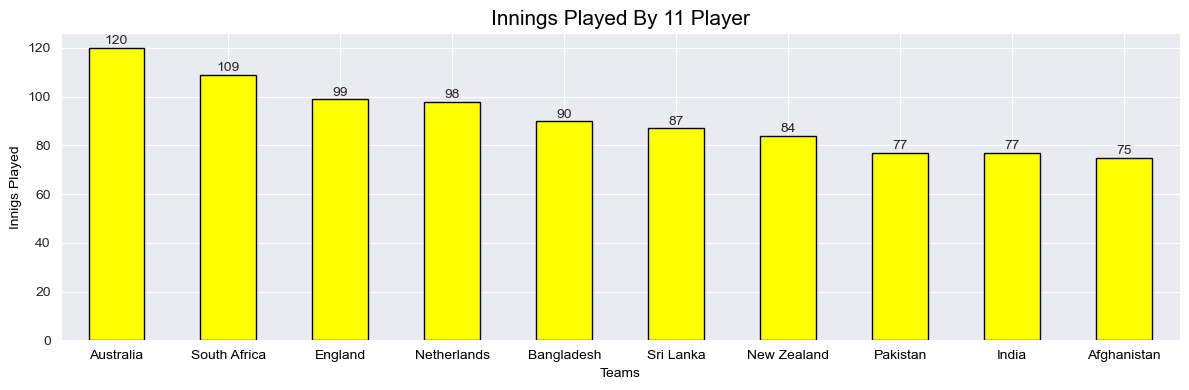

In [201]:
Innings=Batting_data['Team_Innings'].value_counts()
plt.figure(figsize=(12,4))
Innings.plot(kind='bar',color='yellow',edgecolor='black')
plt.title("Innings Played By 11 Player",color='black',size=15)
plt.xlabel('Teams',size=10,color='black')
plt.ylabel("Innigs Played",color='black',size=10)
plt.xticks(rotation=360,color='black')
for i, v in enumerate(Innings):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom',size=10)
plt.tight_layout()
plt.show()

## Top Run-Scorers In The Worldcup

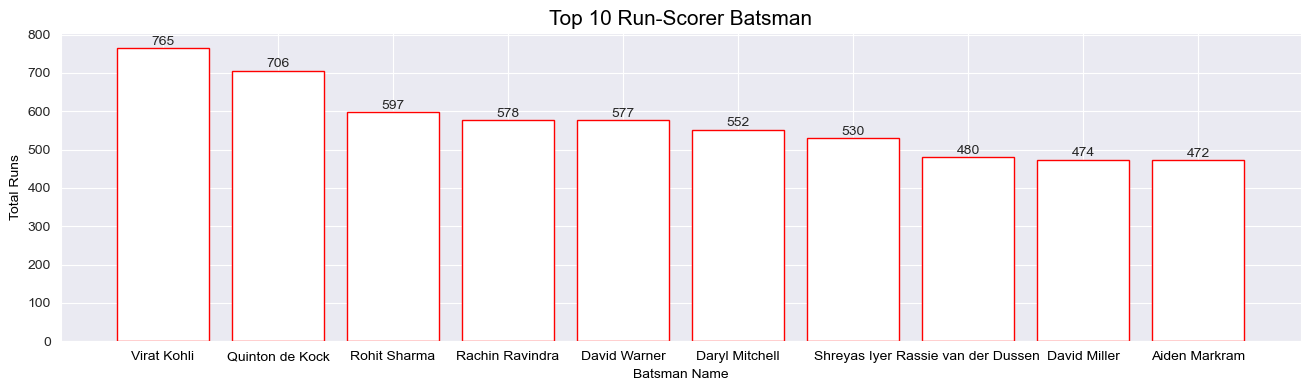

In [202]:
# Grouping the data by Batsman_Name and summing the Runs column for each batsman
top_scorers = Batting_data.groupby('Batsman_Name')['Runs'].sum().reset_index().sort_values(by='Runs', ascending=False)
plt.figure(figsize=(16,4))
plt.bar(top_scorers['Batsman_Name'].head(10), top_scorers['Runs'].head(10),color='white',edgecolor='red')
plt.title('Top 10 Run-Scorer Batsman',size=15,color='black')
plt.xlabel('Batsman Name',size=10,color='black')
plt.ylabel('Total Runs',size=10,color='black')
plt.xticks(rotation=360,color='black')
for index, value in enumerate(top_scorers['Runs'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

In [155]:
top_run_scorers = Batting_data.groupby('Batsman_Name').agg({
    'Runs': 'sum',
    'Balls': 'sum'
}).reset_index().sort_values(by='Runs', ascending=False).head(10)

print(top_run_scorers)

              Batsman_Name  Runs  Balls
143            Virat Kohli   765    847
103        Quinton de Kock   706    675
113           Rohit Sharma   597    474
104        Rachin Ravindra   578    543
21            David Warner   577    539
18          Daryl Mitchell   552    497
125           Shreyas Iyer   530    468
108  Rassie van der Dussen   480    591
20            David Miller   474    459
4            Aiden Markram   472    430


## Batsmen Who Have The Highest Strike Rates

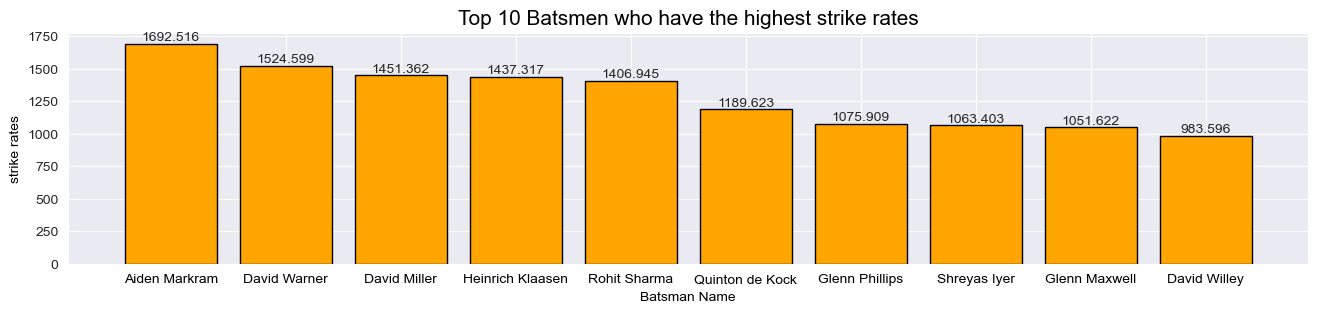

In [194]:
max_Strike_rates=Batting_data.groupby('Batsman_Name')['Strike_Rate'].sum().reset_index().sort_values(by='Strike_Rate',ascending=False)
plt.figure(figsize=(16,3))
plt.bar(max_Strike_rates['Batsman_Name'].head(10), max_Strike_rates['Strike_Rate'].head(10),color='orange',edgecolor='black')
plt.title('Top 10 Batsmen who have the highest strike rates',size=15,color='black')
plt.xlabel('Batsman Name',size=10,color='black')
plt.ylabel('strike rates',size=10,color='black')
plt.xticks(rotation=360,color='black')
for index, value in enumerate(max_Strike_rates['Strike_Rate'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

## Most 4s In World Cup By Players

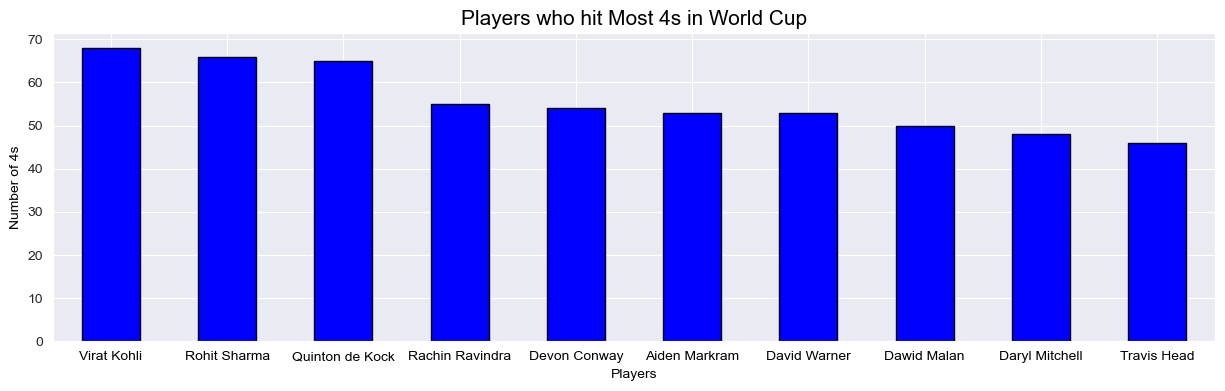

In [157]:
fours = Batting_data[Batting_data['4s'] > 0]
total_4s = fours.groupby('Batsman_Name')['4s'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 4))
total_4s.head(10).plot(kind='bar',color='blue',edgecolor='black')
plt.title('Players who hit Most 4s in World Cup',size=15,color='black')
plt.xlabel('Players',size=10,color='black')
plt.ylabel('Number of 4s',size=10,color='black')
plt.xticks(rotation=360,color='black')
plt.show()

## Most 6s In World Cup By Players

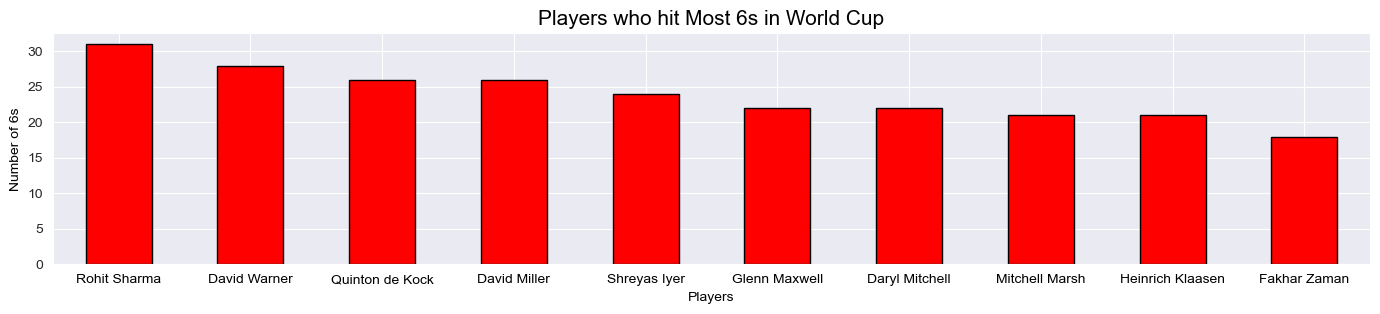

In [158]:
sixs=Batting_data[Batting_data['6s'] > 0]
total_6s = sixs.groupby('Batsman_Name')['6s'].sum().sort_values(ascending=False)
plt.figure(figsize=(17, 3))
total_6s.head(10).plot(kind='bar',color='red',edgecolor='black')
plt.title("Players who hit Most 6s in World Cup",size=15,color='black')
plt.xlabel("Players",size=10,color='black')
plt.ylabel("Number of 6s",size=10,color='black')
plt.xticks(rotation=360,color='black')
plt.show()

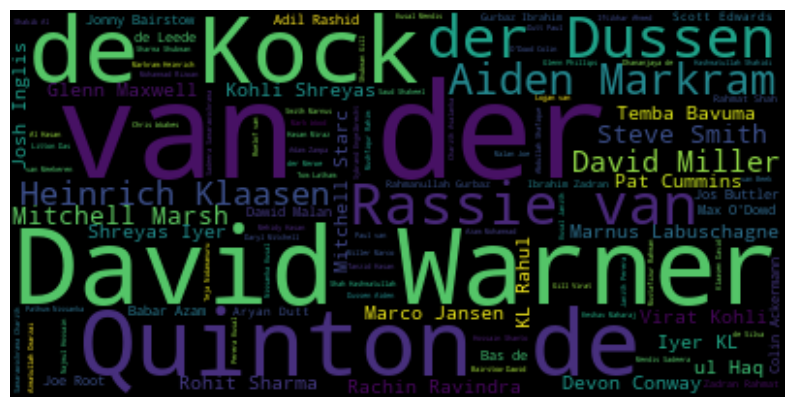

In [159]:
from wordcloud import WordCloud
text_data = ' '.join(Batting_data['Batsman_Name'])
wordcloud = WordCloud().generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Bowling Analysis (EDA)

In [160]:
Bowling_data=pd.read_csv(r'C:\Study Material\CSV Files For Practice\DATA\2023 Worldcup\bowling_summary.csv')

In [161]:
Bowling_data.head(5)

,Match_no,Match_Between,Bowling_Team,Bowler_Name,Overs,Maidens,Runs,Wickets,Economy
0,1,England vs New Zealand,New Zealand,Trent Boult,10.0,1,48,1,4.8
1,1,England vs New Zealand,New Zealand,Matt Henry,10.0,1,48,3,4.8
2,1,England vs New Zealand,New Zealand,Mitchell Santner,10.0,0,37,2,3.7
3,1,England vs New Zealand,New Zealand,Jimmy Neesham,7.0,0,56,0,8.0
4,1,England vs New Zealand,New Zealand,Rachin Ravindra,10.0,0,76,1,7.6


In [162]:
print("Number of Rows",Bowling_data.shape[0])
print("Number of columns",Bowling_data.shape[1])

Number of Rows 574
Number of columns 9


In [163]:
Bowling_data.dtypes

Match_no           int64
Match_Between     object
Bowling_Team      object
Bowler_Name       object
Overs            float64
Maidens            int64
Runs               int64
Wickets            int64
Economy          float64
dtype: object

In [164]:
Bowling_data.isnull().sum()

Match_no         0
Match_Between    0
Bowling_Team     0
Bowler_Name      0
Overs            0
Maidens          0
Runs             0
Wickets          0
Economy          0
dtype: int64

In [165]:
Bowling_data.describe().T.style.background_gradient(cmap='hot')

,count,mean,std,min,25%,50%,75%,max
Match_no,574.000000,24.376307,13.956222,1.000000,12.000000,24.000000,36.000000,48.000000
Overs,574.000000,7.351045,2.685601,0.300000,6.000000,8.000000,10.000000,10.000000
Maidens,574.000000,0.256098,0.533933,0.000000,0.000000,0.000000,0.000000,3.000000
Runs,574.000000,42.322300,19.651473,1.000000,30.000000,41.000000,55.000000,115.000000
Wickets,574.000000,1.202091,1.193757,0.000000,0.000000,1.000000,2.000000,7.000000
Economy,574.000000,5.924564,2.135988,1.355000,4.500000,5.670000,7.075000,16.000000


## Wickets Taken By Bowlers 

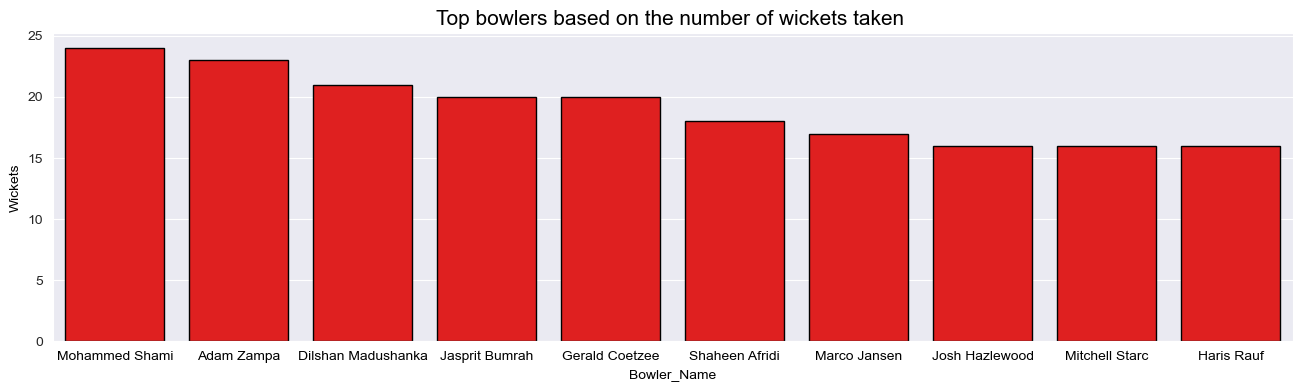

In [166]:
Top_wickets=Bowling_data.groupby('Bowler_Name')['Wickets'].sum().reset_index().sort_values(by='Wickets', ascending=False)
plt.figure(figsize=(16,4))
sns.barplot(Top_wickets['Bowler_Name'].head(10),Top_wickets['Wickets'].head(10),color='red',edgecolor='black')
plt.title('Top bowlers based on the number of wickets taken ',size=15,color='black')
plt.xlabel('Bowler_Name',size=10,color='black')
plt.ylabel('Wickets',size=10,color='black')
plt.xticks(rotation=360,color='black')
plt.show()

## Correlation Between Overs Bowled And Runs Conceded

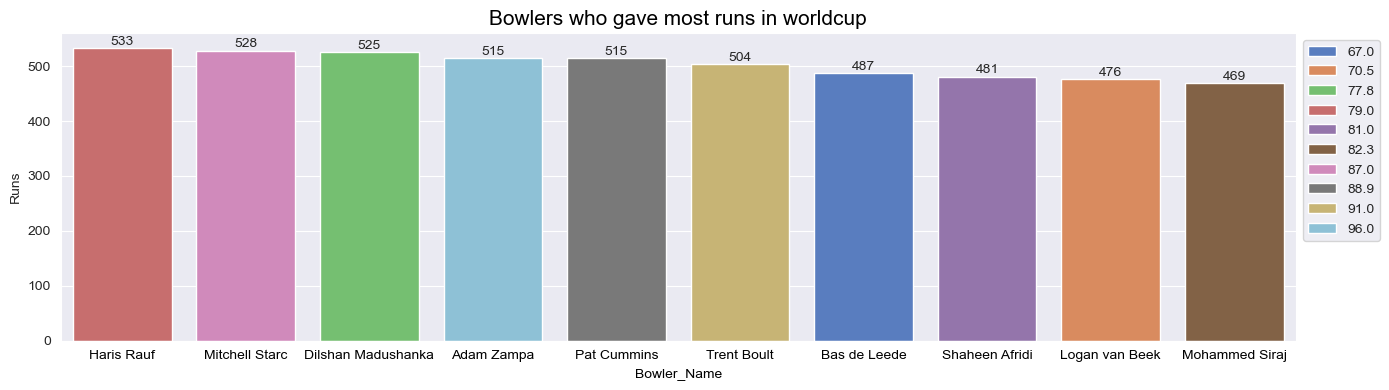

In [199]:
Runs_conceded = Bowling_data.groupby('Bowler_Name')['Runs'].sum().reset_index().sort_values(by='Runs', ascending=False)
Total_overs = Bowling_data.groupby('Bowler_Name')['Overs'].sum().reset_index()
merged_data = pd.merge(Runs_conceded, Total_overs, on='Bowler_Name')
plt.figure(figsize=(14, 4))
sns.barplot(x='Bowler_Name', y='Runs', data=merged_data.head(10), hue='Overs', dodge=False, palette='muted')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Bowlers who gave most runs in worldcup', size=15, color='black')
plt.xlabel('Bowler_Name', size=10, color='black')

for index, value in enumerate(merged_data['Runs'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=360, color='black')
plt.tight_layout()
plt.show()

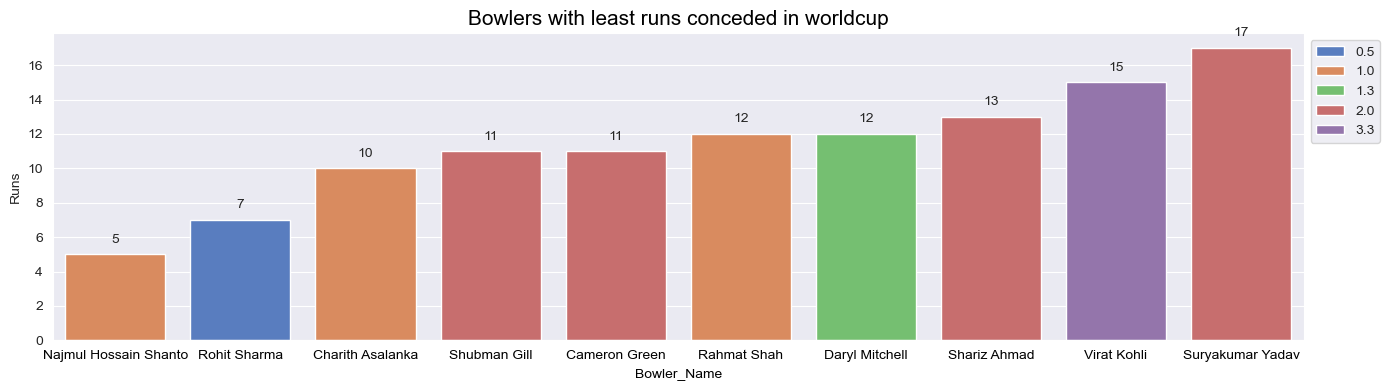

In [200]:
# Total runs conceded by each bowler
Runs_conceded = Bowling_data.groupby('Bowler_Name')['Runs'].sum().reset_index().sort_values(by='Runs', ascending=True)

# Total overs thrown by each bowler
Total_overs = Bowling_data.groupby('Bowler_Name')['Overs'].sum().reset_index()

# Merge the data to include both runs conceded and total overs
merged_data = pd.merge(Runs_conceded, Total_overs, on='Bowler_Name')

plt.figure(figsize=(14, 4))
sns.barplot(x='Bowler_Name', y='Runs', data=merged_data.head(10), hue='Overs', dodge=False, palette='muted')

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.title('Bowlers with least runs conceded in worldcup', size=15, color='black')
plt.xlabel('Bowler_Name', size=10, color='black')

# Data labels
for index, value in enumerate(merged_data['Runs'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=360, color='black')
plt.tight_layout()
plt.show()

## Economy Rate Vary Across Different Bowlers

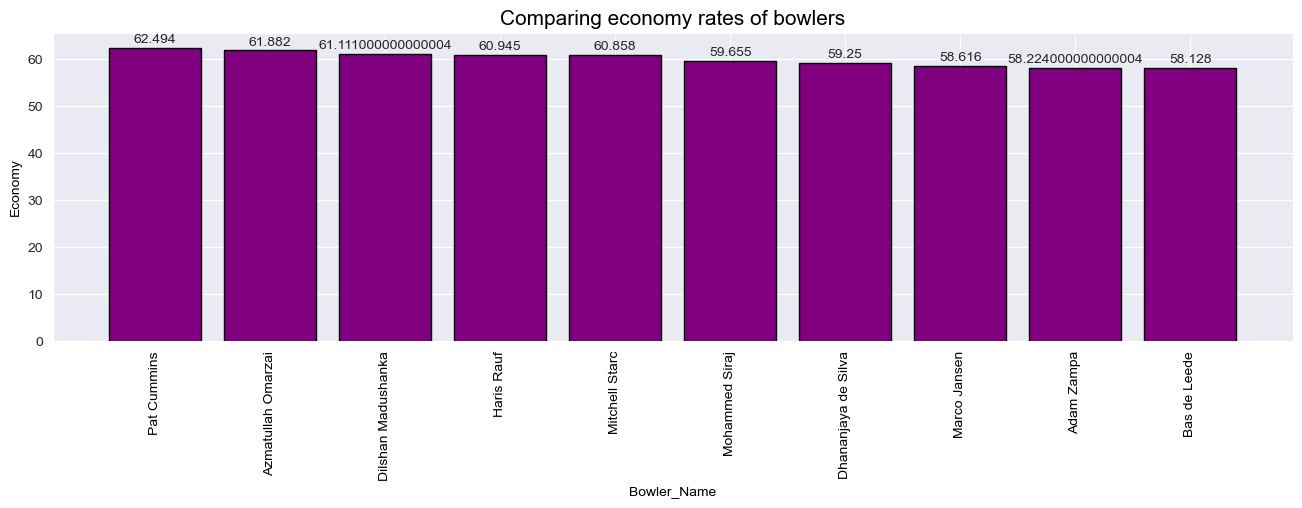

In [198]:
Bowler_Economy=Bowling_data.groupby('Bowler_Name')['Economy'].sum().reset_index().sort_values(by='Economy', ascending=False)
plt.figure(figsize=(16,4))
plt.bar(Bowler_Economy['Bowler_Name'].head(10),Bowler_Economy['Economy'].head(10),color='purple',edgecolor='black')
plt.title('Comparing economy rates of bowlers',size=15,color='black')
plt.xlabel('Bowler_Name',size=10,color='black')
plt.ylabel('Economy',size=10,color='black')
plt.xticks(rotation=90,color='black')
sns.set_style(style="darkgrid")
for index, value in enumerate(Bowler_Economy['Economy'].head(10)):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

## Maidens By Bowlers

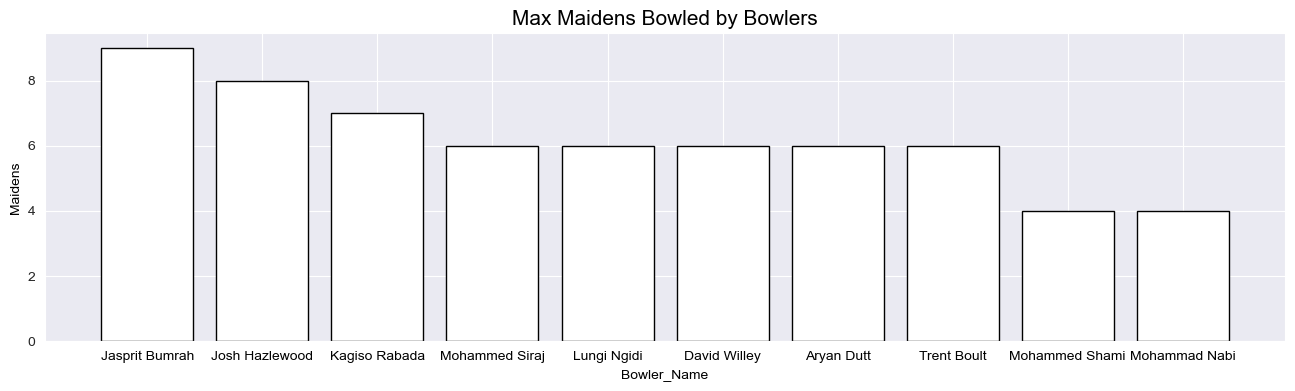

In [170]:
Maidens=Bowling_data.groupby('Bowler_Name')['Maidens'].sum().reset_index().sort_values(by='Maidens', ascending=False)
plt.figure(figsize=(16,4))
plt.bar(Maidens['Bowler_Name'].head(10),Maidens['Maidens'].head(10),color='white',edgecolor='black')
plt.title('Max Maidens Bowled by Bowlers',size=15,color='black')
plt.xlabel('Bowler_Name',size=10,color='black')
plt.ylabel('Maidens',size=10,color='black')
plt.xticks(rotation=360,color='black')
sns.set_style(style="darkgrid")
plt.show()

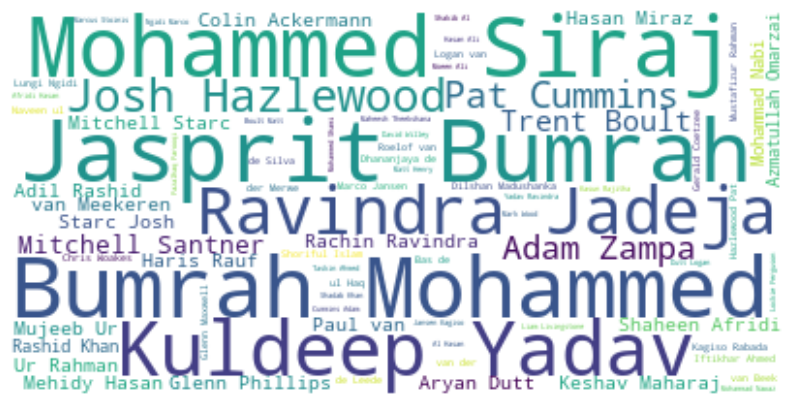

In [171]:
from wordcloud import WordCloud
text_data = ' '.join(Bowling_data['Bowler_Name'])
wordcloud = WordCloud(contour_color='steelblue', background_color='white').generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()